### Summary
Goal is to make a synthetic sample learning curve  
superimposed on both the input-feature and decoded-feature curves  
for each of the five TCGA cancers with the least number of samples

### Code demo schematics

In [13]:
from IPython.display import Image

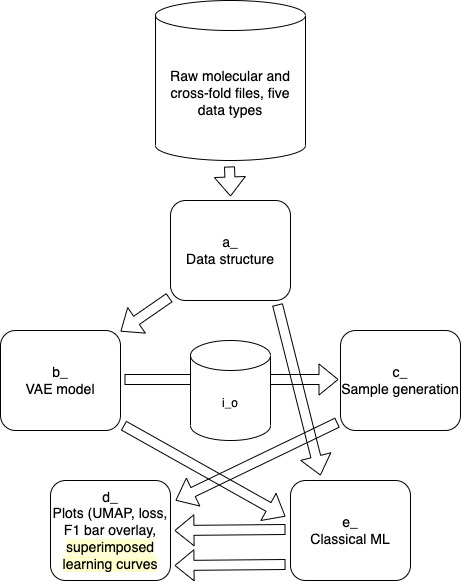

In [76]:
Image("DAG_smpl_effct_repo.jpg", width = 400)

In [ ]:
# Use hold-out (validation) set 
# Information leakage

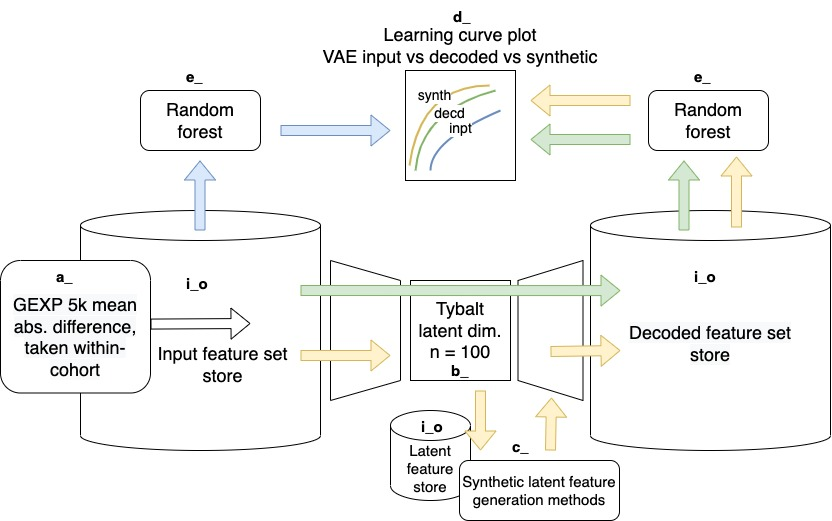

In [77]:
Image("learning_curve_schematic_v2.jpg", width = 400)

### Ops notes

In [ ]:
# from:
# '/Users/karlberb/Documents/work/sample_count/synthetic_TCGA_data_gen/g_learning_curves/i_o/shuffle/super_1'

# also, about 10 b_model notebooks back in the g_devel dir
# work toward focus-in on slide 7

In [12]:
ls

DAG_smpl_effct_repo.drawio           learning_curve_schematic.drawio
DAG_smpl_effct_repo.jpg              learning_curve_schematic.drawio.png
PDF.ipynb                            learning_curve_schematic_v2.drawio
c_latent_sampling.ipynb              learning_curve_schematic_v2.jpg
figure_five.ipynb                    shuffle.ipynb
i_o/


### Imports

In [1]:
import pandas as pd
import glob as glob
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from statistics import mean
from statistics import stdev
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import time
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.layers import BatchNormalization, Activation, Layer
from tensorflow.keras import metrics, optimizers
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.callbacks import Callback
import tensorflow.compat.v1.keras.backend as K
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

### Data

In [ ]:
# a_ structure feature-set code block here
    # Purpose will be to use feature selection in addition to DL / 
    # classical ML architechting / tuning / training protocol
    # to dial-in the clf F1 box plot
    # alignment within each cohort


In [23]:
wthn_pths = sorted(
    glob.glob(
        '/Users/karlberb/Documents/work/sample_count/synthetic_TCGA_data_gen/g_devel/data_5k/*.tsv'))
brca_5k_within = pd.read_csv(
    wthn_pths[2], sep = '\t', index_col = 0)

In [24]:
acrss_pths = sorted(glob.glob('../g_devel/data_GEXP_5k_col_norm/*.tsv'))
brca_5k_across = pd.read_csv(acrss_pths[2], sep="\t", index_col=0)

In [ ]:
# g_devel/d_org-dcd.ipynb # for starting-point

In [3]:
pwd

'/Users/karlberb/Documents/work/sample_count/synthetic_TCGA_data_gen/g_learning_curves'

In [5]:
ls ..

J_Lab_shell_template.sh           f_archive/
M1_venv_sc/                       g_devel/
Miniforge3-MacOSX-arm64.sh        g_learning_curves/
README.md                         j_lab_shell.sh
a_data_structure/                 j_lab_tunnel_summary.txt
b_model/                          j_lb_ump.sh
conda_activate_tf_M1_py3dot9.txt  requirements.txt
d_UMAP/                           tf_M1_py3dot9.ipynb


In [8]:
org = pd.read_csv(
    '../g_devel/original_baseline_F1s/5k_r0.tsv',
    sep = '\t', index_col = 0)

In [9]:
dec = pd.read_csv('../g_devel/self_F1s/RF_self-decoded_F1s.tsv', sep = '\t', index_col = 0)

orig done


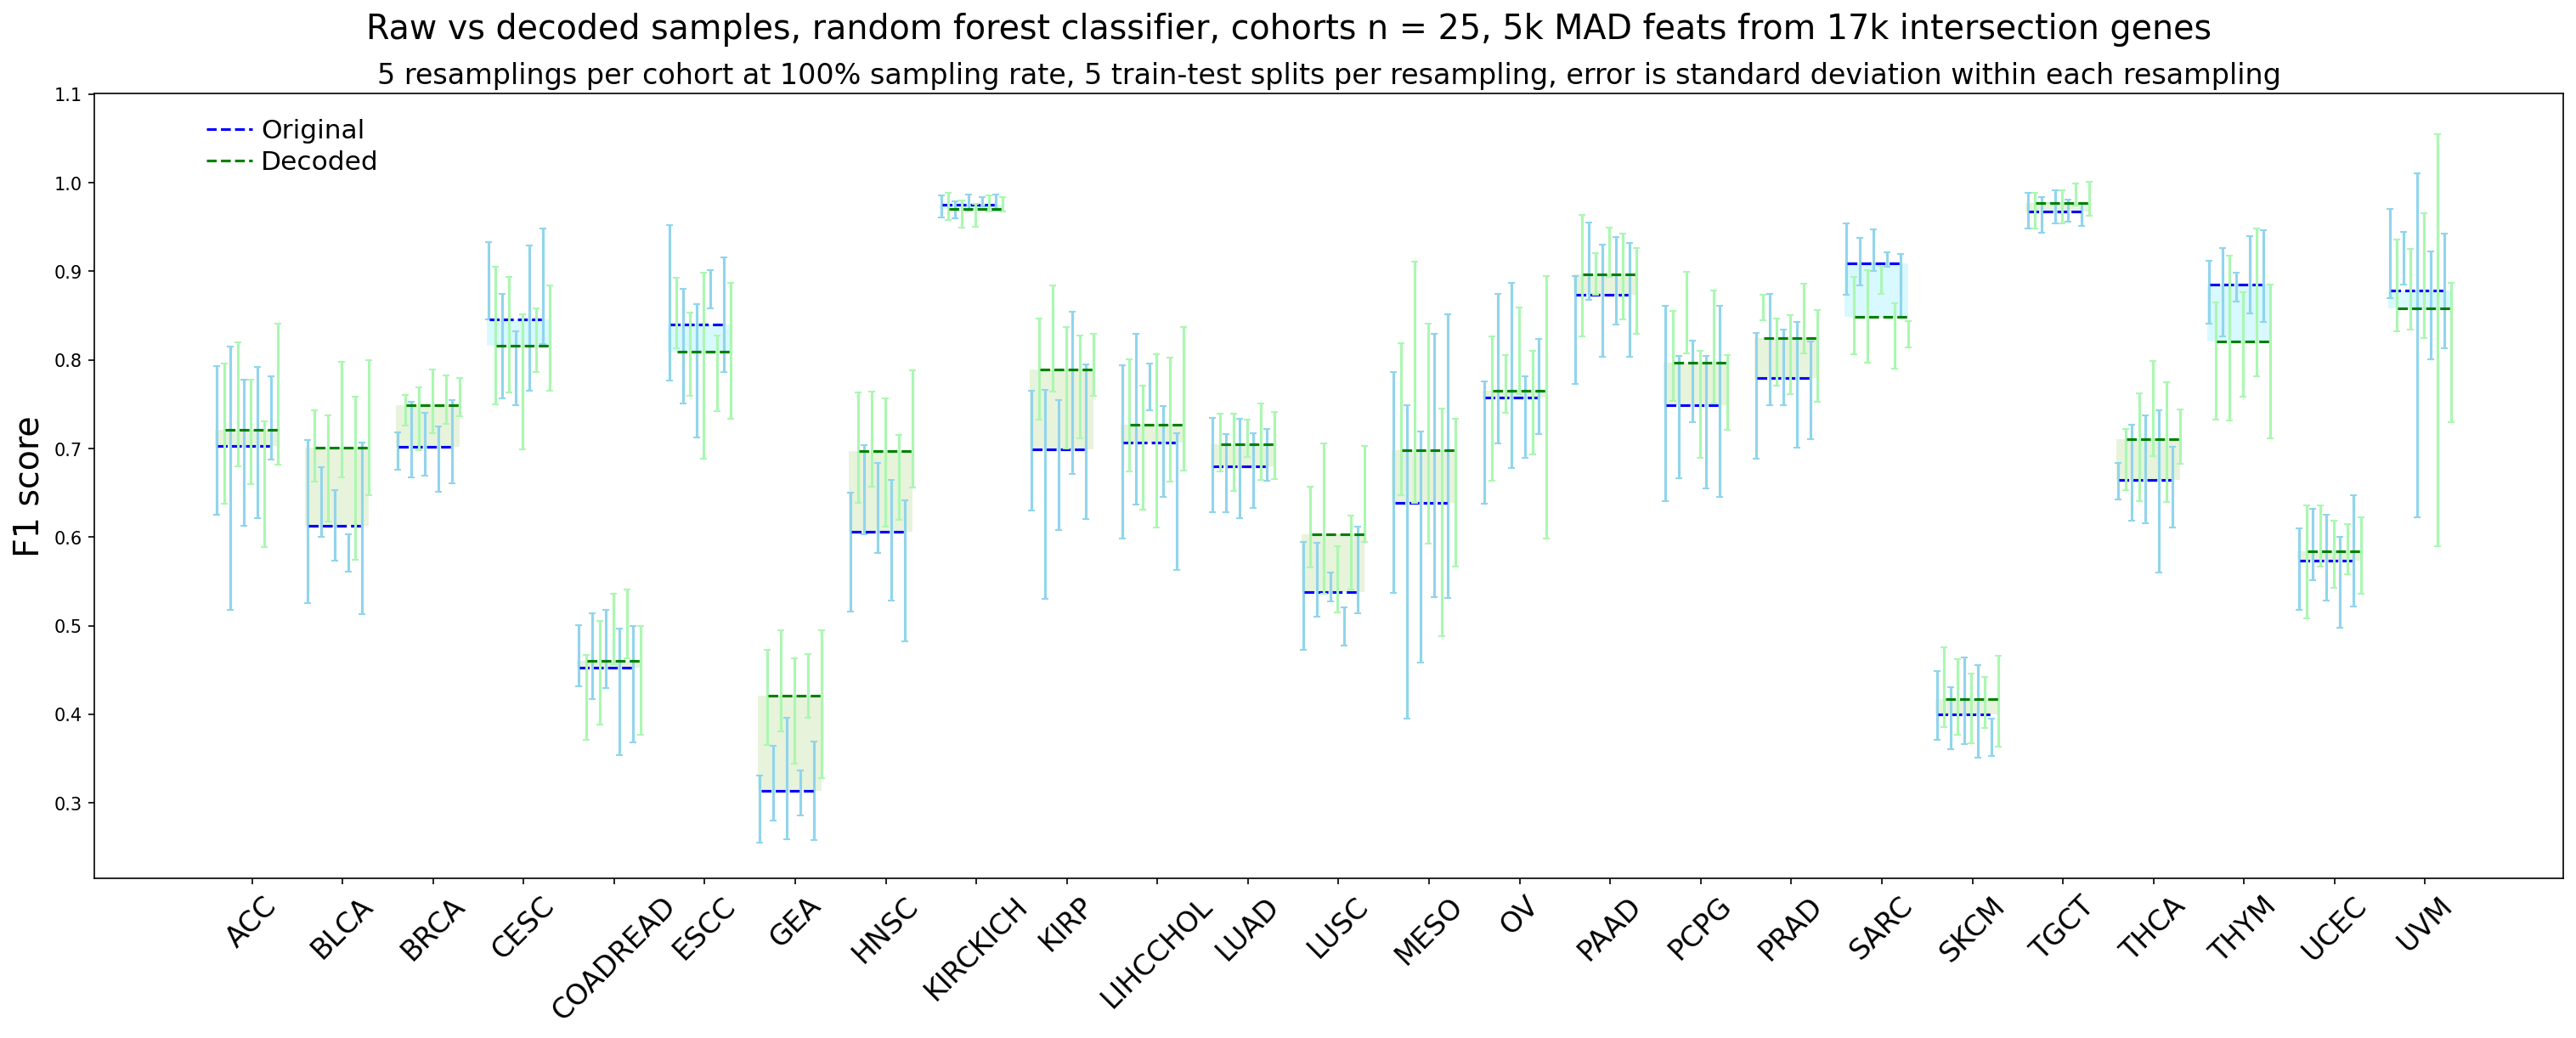

In [22]:
# Input and decoded overlay plot - get a good feature set / model set / training protocol 
    # for each of the low-sample count cohorts
plt_v=0 # Version 0 in the figure_five

re_samp = 5 # use file name
trn_tst_splts = 5

figure(figsize=(len(org.index), 8), dpi=150)
# plt.scatter(.01, .99, color = 'white')

x_tck_lst = [] # only need once, done in raw section
cohort_list = [] # only need once, done in raw section

# Original GEXP start
original_ave_means = []
for idx_pos, idx in enumerate(org.index):

    x = idx_pos-.04
    org_ave_mean = [] # for raw, need for deco
    for rs in list(range(0,re_samp)): # use to step through the columns

        adder = .15
        x = x+adder
        plt.errorbar(
            x,
            org.loc[idx, 'mean'+str(rs)],
            yerr=org.loc[idx, 'std'+str(rs)], capsize = 2,
            color = '#90D5EC')
        org_ave_mean.append(org.loc[idx, 'mean'+str(rs)])
    original_ave_means.append(mean(org_ave_mean))
    x_points = [x-.5-.09, x]
    y_points = [mean(org_ave_mean), mean(org_ave_mean)]
    plt.plot(x_points, y_points, linestyle='dashed', color = 'blue') # blue is raw
# end orig gexp
    
    x_tck_lst.append(idx_pos+.5) # only need once, send to end
    cohort_list.append(idx.split('_')[0]) # only need once, send to end
print('orig done')


for idx_pos, idx in enumerate(dec.index): # decoded is green

    x = idx_pos+.04
    dec_ave_mean = []
    for rs in list(range(0,re_samp)): # use to step through the columns

        adder = .15
        x = x+adder
        plt.errorbar(
            x,
            dec.loc[idx, 'mean'+str(rs)],
            yerr=dec.loc[idx, 'std'+str(rs)], capsize = 2,
            color = '#abf7b1')
        dec_ave_mean.append(dec.loc[idx, 'mean'+str(rs)])
        
    x_points = [x-.5-.09, x]
    y_points = [mean(dec_ave_mean), mean(dec_ave_mean)]
    plt.plot(x_points, y_points, linestyle='dashed', color = 'green') # decoded
    
    if original_ave_means[idx_pos] > mean(dec_ave_mean):
        plt.bar(x, height = original_ave_means[idx_pos]-mean(dec_ave_mean),
                width = -.7,
                bottom = mean(dec_ave_mean),
                align = 'edge', color = '#d8f9ff')
        

    if original_ave_means[idx_pos] < mean(dec_ave_mean):
        plt.bar(x, height = original_ave_means[idx_pos]-mean(dec_ave_mean),
                width = -.7,
                bottom = mean(dec_ave_mean),
                align = 'edge', color = '#e8f3db')
    # break
plt.xticks(x_tck_lst, labels = cohort_list, rotation = 45, fontsize = 16) 
plt.suptitle(
    'Raw vs decoded samples, random forest classifier, cohorts n = 25, 5k MAD feats from 17k intersection genes',
    fontsize = 19, y= .96)
plt.title('5 resamplings per cohort at 100% sampling rate, 5'+
          ' train-test splits per resampling, error is standard deviation within each resampling',
         fontsize = 16)
plt.ylabel('F1 score', fontsize = 19)
legend_x, legend_y = -.0, 1.06
y_off = .035

plt.plot((legend_x, legend_x+.5), (legend_y, legend_y),
         linestyle='dashed', color = 'blue') # original
plt.plot((legend_x, legend_x+.5), (legend_y-y_off, legend_y-y_off),
         linestyle='dashed', color = 'green') # decoded

center = .010
plt.annotate('Original', (legend_x+.6,legend_y-center), fontsize = 15)          # blue
plt.annotate('Decoded', (legend_x+.6, legend_y-y_off-center), fontsize = 15) # green

plt.savefig('i_o/figure_five/overlay_repro'+str(plt_v)+'.png',
            dpi = 150, bbox_inches = 'tight')

In [ ]:
# notes: analog to image blurring, relation of sample size to propensity for encoding to improve score
# simplify / remove error bars
# PCA / UMAP to compare clusters

In [ ]:
# run the whole pipeline in this notebook
# similar to shuffle.ipynb notebook
    # go back and line up the a_ data structure later - noted placeholder - done
# Need trained decoder and three dictionaries in memory

### Input GEXP to VAE Learning curve

In [27]:
acc_5k_within = pd.read_csv(
    wthn_pths[0], sep = '\t', index_col = 0)

In [28]:
escc_5k_within = pd.read_csv(
    wthn_pths[5], sep = '\t', index_col = 0)

In [31]:
escc_5k_within

,Labels,N:GEXP::KRT5:3852:,N:GEXP::KRT6A:3853:,N:GEXP::KRT14:3861:,N:GEXP::KRT13:3860:,N:GEXP::COL1A1:1277:,N:GEXP::KRT4:3851:,N:GEXP::KRT17:3872:,N:GEXP::COL3A1:1281:,N:GEXP::FN1:2335:,...,N:GEXP::DECR1:1666:,N:GEXP::TXNDC12:51060:,N:GEXP::SGEF:26084:,N:GEXP::RAD51AP1:10635:,N:GEXP::UBR2:23304:,N:GEXP::SLC10A3:8273:,N:GEXP::TBC1D15:64786:,N:GEXP::DOT1L:84444:,N:GEXP::IDH3G:3421:,N:GEXP::PLCD3:113026:
ESCC,,,,,,,,,,,,,,,,,,,,,
TCGA-IG-A3I8,ESCC_1,0.094194,0.033715,0.015425,0.000337,0.068758,0.000374,0.185790,0.071257,0.059315,...,0.346068,0.417745,0.108240,0.060369,0.238874,0.310954,0.309497,0.789836,0.378817,0.096569
TCGA-IG-A3QL,ESCC_1,0.405273,0.043436,0.002241,0.001311,0.199997,0.000093,0.929467,0.214320,0.065981,...,0.758644,0.571750,0.943510,0.118091,0.119139,0.370845,0.227473,0.503796,0.298028,0.110931
TCGA-IG-A3Y9,ESCC_2,0.669114,0.291162,0.517705,0.002542,0.359108,0.000007,0.397018,0.397619,0.081479,...,0.679502,0.847638,0.059719,0.038805,0.290589,0.428000,0.307486,0.291027,0.411268,0.250711
TCGA-IG-A3YA,ESCC_1,0.158753,0.060086,0.009813,0.008902,0.149238,0.000373,0.101753,0.226635,0.150650,...,0.442702,0.583649,0.520088,0.089217,0.293583,0.308076,0.312010,0.444348,0.353777,0.102363
TCGA-IG-A3YB,ESCC_1,0.151301,0.003702,0.033122,0.001194,0.062298,0.000793,0.000256,0.088232,0.043021,...,0.361633,0.490460,0.141600,0.032020,0.467543,0.285996,0.259171,0.377274,0.260917,0.164771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-XP-A8T8,ESCC_1,0.219650,0.147693,0.046555,0.014674,0.020357,0.001908,0.254108,0.020813,0.006722,...,0.484259,0.440863,0.219045,0.072036,0.364043,0.443547,0.142956,0.467621,0.391927,0.278892
TCGA-Z6-A8JD,ESCC_2,0.711973,0.163520,0.459001,0.002138,0.502072,0.000306,0.246781,0.396442,0.234027,...,0.557757,0.566319,0.005921,0.085422,0.405384,0.502635,0.279507,0.631280,0.476318,0.180708
TCGA-Z6-A8JE,ESCC_1,0.067417,0.115369,0.024549,0.000049,0.519415,0.010801,0.127292,0.726538,0.214486,...,0.311928,0.666512,0.375881,0.116469,0.350243,0.380274,0.294642,0.336192,0.378196,0.304304


In [29]:
uvm_5k_within = pd.read_csv(
    wthn_pths[24], sep = '\t', index_col = 0)

In [32]:
uvm_5k_within

,Labels,N:GEXP::SILV:6490:,N:GEXP::VIM:7431:,N:GEXP::EEF2:1938:,N:GEXP::EEF1A1:1915:,N:GEXP::TYRP1:7306:,N:GEXP::RPL8:6132:,N:GEXP::ACTG1:71:,N:GEXP::GAPDH:2597:,N:GEXP::RPL3:6122:,...,N:GEXP::LANCL1:10314:,N:GEXP::PGM2:55276:,N:GEXP::CD109:135228:,N:GEXP::TSG101:7251:,N:GEXP::C14orf156:81892:,N:GEXP::KIAA1267:284058:,N:GEXP::TROVE2:6738:,N:GEXP::RPS6KA1:6195:,N:GEXP::LHPP:64077:,N:GEXP::ADSSL1:122622:
UVM,,,,,,,,,,,,,,,,,,,,,
TCGA-RZ-AB0B,UVM_1,0.049329,0.113273,0.205541,0.274543,0.056252,0.257220,0.316926,0.299502,0.220638,...,0.600902,0.447201,0.689532,0.592820,0.571723,0.587526,0.771786,0.298575,0.184503,0.445220
TCGA-V3-A9ZX,UVM_1,0.191534,0.136906,0.286935,0.199163,0.108863,0.395985,0.266163,0.322607,0.310035,...,0.412766,0.323238,0.209422,0.628877,0.484946,0.594978,0.429256,0.823371,0.218109,0.347935
TCGA-V3-A9ZY,UVM_2,0.359235,0.736213,0.895948,0.829340,0.205657,0.454886,0.624555,0.371956,0.971843,...,0.247071,0.078117,0.090661,0.485191,0.309709,0.381499,0.186376,0.724159,0.700995,0.590557
TCGA-V4-A9E5,UVM_2,0.559425,0.556557,0.321535,0.544758,0.117493,0.420766,0.875615,0.801674,0.471611,...,0.294132,0.061891,0.006216,0.911723,0.479432,0.337266,0.245611,0.476948,0.403302,0.594976
TCGA-V4-A9E7,UVM_4,0.415635,0.191918,0.452556,0.174965,0.252425,0.528461,0.438033,0.549599,0.446272,...,0.449073,0.340711,0.012965,0.636369,0.672068,0.357687,0.295376,0.397226,0.359252,0.419117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-WC-AA9E,UVM_3,0.254054,0.360969,0.327884,0.257412,0.241200,0.330306,0.475643,0.196496,0.699047,...,0.738428,0.141104,0.016027,0.860777,0.548471,0.692508,0.548330,0.148672,0.177739,0.248769
TCGA-YZ-A980,UVM_1,0.162380,0.301202,0.225812,0.265000,0.302364,0.132765,0.233179,0.356945,0.254916,...,0.657300,0.365378,0.135762,0.523735,0.340311,0.565120,0.350495,0.438771,0.301223,0.325489
TCGA-YZ-A982,UVM_2,0.631010,0.246536,0.197639,0.167432,0.632238,0.337572,0.589997,0.206924,0.298833,...,0.374542,0.171087,0.029311,0.698282,0.293600,0.510753,0.201791,0.397357,0.464631,0.343623


In [33]:
feature_selection_method = 'within_cohort' # <--- Feature set toggle

In [ ]:
feature_selection_method = 'across_cohort'

In [34]:
df_to_rf = uvm_5k_within # <--- Cohort toggle

In [ ]:
df_to_rf = xxx_5k_across

In [36]:
df_to_rf.index.name

'UVM'

In [35]:
print('starting learning curve generation on labled feature set')
# inpt_RF_F1_dct = {}

inpt_RF_F1_means = {}
for smp_sz in list(range(10, 70, 5)): # UVM <--- across run, plot up to 100?
# for smp_sz in list(range(10, 151, 5)): # BRCA <--- across run, plot up to 100?
# for smp_sz in list(range(15, 76, 5)): # ACC <---
    
    print(smp_sz)
    
    RF_output = []
    resmpl_count = 250
    for r in list(range(0, resmpl_count)):
        
        labeled_sample_subset_frame = df_to_rf.sample(smp_sz)
        X = labeled_sample_subset_frame.iloc[:, 1:]
        y = labeled_sample_subset_frame.iloc[:, 0]
        X_train, X_test, y_train, y_test = train_test_split(
                    X, y,
                        test_size=0.33,
                            )
        RF_clf = RandomForestClassifier(max_depth=2)
        RF_clf.fit(X_train, y_train)

        RF_F1_scr = f1_score(y_test, RF_clf.predict(X_test), average='weighted')
        RF_output.append(RF_F1_scr)

    inpt_RF_F1_means[smp_sz] = round(mean(RF_output), 3)
    
    # INPUT dict - raw F1 scores for error plot <note>
    # inpt_RF_F1_dct[smp_sz] = RF_output
    # break
print('Learning curve object generated, send to plot function')

starting learning curve generation on labled feature set
10
15
20
25
30
35
40
45
50
55
60
65
Learning curve object generated, send to plot function


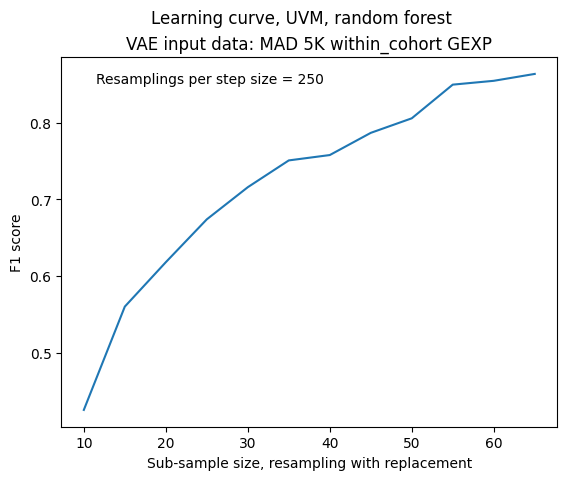

In [37]:
plt.plot(list(inpt_RF_F1_means.keys()),
       inpt_RF_F1_means.values(), label = 'Mean weighted F1')
plt.suptitle('Learning curve, '+df_to_rf.index.name+', random forest')
plt.title('VAE input data: MAD 5K '+feature_selection_method+' GEXP') # copy and modify 
plt.ylabel('F1 score')                                                # for decoded naming
plt.xlabel('Sub-sample size, resampling with replacement')
plt.annotate('Resamplings per step size = '+str(resmpl_count),
                xy=(.15, .85), xycoords='figure fraction',
                horizontalalignment='left', verticalalignment='top',
                )
plt.savefig(
    'i_o/figure_five/'+ # Project sub-directory toggle
    str(df_to_rf.index.name)+'_'+feature_selection_method+'_'+ # add decoded to naming
    str(list(inpt_RF_F1_means.keys())[0])+'-to-'+str(smp_sz)+       # for post-VAE plots
    '_'+str(resmpl_count)+'-rsmpls'+
    '_super_1.png', bbox_inches = 'tight')

In [ ]:
# Observation: looks too smooth, turn down the resamplings from 250 to 150

In [38]:
len(inpt_RF_F1_means) # 70 from 10 in steps of 5

12

### VAE

#### Setup VAE

In [41]:
# Function set for leave one out loop
def compute_latent(x): # x:
    mu, sigma = x
    batch = K.shape(mu)[0]
    dim = K.shape(mu)[1]
    eps = K.random_normal(shape=(batch,dim), mean=0., stddev=1.0 )
    return mu + K.exp(sigma/2)*eps

# Set custom layer , will need all this at start of shell script
class CustomVariationalLayer(Layer):
    """
    Define a custom layer
    """
    def __init__(self, **kwargs):
        self.is_placeholder = True
        super(CustomVariationalLayer, self).__init__(**kwargs)

    def vae_loss(self, x_input, x_decoded):
        reconstruction_loss = original_dim * metrics.binary_crossentropy(x_input, x_decoded)
        kl_loss = - 0.5 * K.sum(1 + z_log_var_encoded - K.square(z_mean_encoded) - 
                                K.exp(z_log_var_encoded), axis=-1)
        return K.mean(reconstruction_loss + (K.get_value(beta) * kl_loss))

    def call(self, inputs):
        x = inputs[0]
        x_decoded = inputs[1]
        loss = self.vae_loss(x, x_decoded)
        self.add_loss(loss, inputs=inputs)
        return x
    
class WarmUpCallback(Callback):
    def __init__(self, beta, kappa):
        self.beta = beta
        self.kappa = kappa

    def on_epoch_end(self, epoch, logs={}):
        if K.get_value(self.beta) <= 1:
            K.set_value(self.beta, K.get_value(self.beta) + self.kappa)

#### Main VAE

In [47]:
feature_set = 'mad_5k_within'
decode_df = uvm_5k_within
c = uvm_5k_within.index.name
fit_on = 'UVM'
super_v = '0'

Train on 74 samples
Epoch 1/160


2022-11-30 14:16:52.739573: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-30 14:16:52.784888: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-30 14:16:52.809370: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-30 14:16:52.972717: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-30 14:16:53.028640: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-30 14:16:53.053661: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


74/74 [==============================] - 1s 8ms/sample - loss: 3470.9848
Epoch 2/160
74/74 [==============================] - 0s 470us/sample - loss: 3467.4580
Epoch 3/160
74/74 [==============================] - 0s 418us/sample - loss: 3464.0214
Epoch 4/160
74/74 [==============================] - 0s 360us/sample - loss: 3460.9604
Epoch 5/160
74/74 [==============================] - 0s 368us/sample - loss: 3457.0443
Epoch 6/160
74/74 [==============================] - 0s 356us/sample - loss: 3453.3481
Epoch 7/160
74/74 [==============================] - 0s 345us/sample - loss: 3450.6548
Epoch 8/160
50/74 [===================>..........] - ETA: 0s - loss: 3447.5161

2022-11-30 14:16:53.517951: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


74/74 [==============================] - 0s 353us/sample - loss: 3446.3594
Epoch 9/160
74/74 [==============================] - 0s 334us/sample - loss: 3443.3308
Epoch 10/160
74/74 [==============================] - 0s 382us/sample - loss: 3439.8125
Epoch 11/160
74/74 [==============================] - 0s 335us/sample - loss: 3437.4680
Epoch 12/160
74/74 [==============================] - 0s 314us/sample - loss: 3431.2757
Epoch 13/160
74/74 [==============================] - 0s 325us/sample - loss: 3431.3711
Epoch 14/160
74/74 [==============================] - 0s 350us/sample - loss: 3427.4459
Epoch 15/160
74/74 [==============================] - 0s 318us/sample - loss: 3422.5260
Epoch 16/160
74/74 [==============================] - 0s 334us/sample - loss: 3416.6991
Epoch 17/160
74/74 [==============================] - 0s 356us/sample - loss: 3417.4198
Epoch 18/160
74/74 [==============================] - 0s 316us/sample - loss: 3412.8294
Epoch 19/160
74/74 [==========================

/Users/karlberb/miniforge3/envs/tf_M1_py3dot9/lib/python3.9/site-packages/keras/engine/training_v1.py:2356: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
2022-11-30 14:16:57.469516: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-30 14:16:57.565640: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Decode cohort trained on self using mad_5k_within feature set experiment done


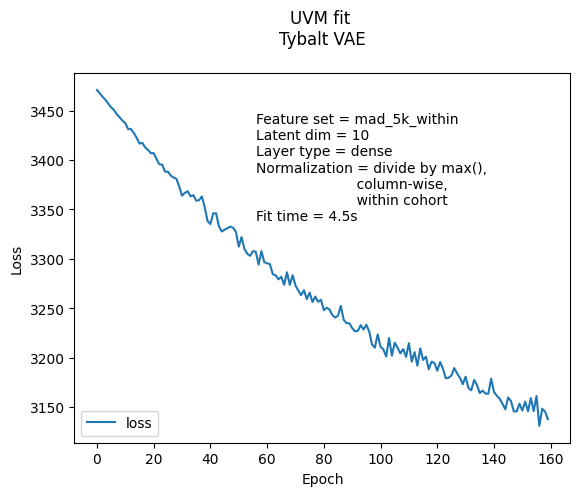

In [49]:
# Decode all samples after training on self with MAD 5k taken
  # either within or across cohort
# from shuffle in g_learning_curves

features = decode_df.columns[1:] # direct decode, will need fitting / dedoding frames

original_dim = len(features)
feature_dim = len(features)
latent_dim = 10               # Toggle here, to plot labels!

encoder_inputs = keras.Input(shape=(feature_dim,))
z_mean_dense_linear = layers.Dense(latent_dim, kernel_initializer='glorot_uniform', name="encoder_1")(encoder_inputs)
z_mean_dense_batchnorm = layers.BatchNormalization()(z_mean_dense_linear)
z_mean_encoded = layers.Activation('relu')(z_mean_dense_batchnorm)

z_log_var_dense_linear = layers.Dense(latent_dim, kernel_initializer='glorot_uniform', name="encoder_2")(encoder_inputs)
z_log_var_dense_batchnorm = layers.BatchNormalization()(z_log_var_dense_linear)
z_log_var_encoded = layers.Activation('relu')(z_log_var_dense_batchnorm)

latent_space = layers.Lambda(compute_latent, output_shape=(latent_dim,), name="latent_space")([z_mean_encoded, z_log_var_encoded])

decoder_to_reconstruct = layers.Dense(feature_dim, kernel_initializer='glorot_uniform', activation='sigmoid')
decoder_outputs = decoder_to_reconstruct(latent_space)

learning_rate = 0.0005
kappa = 1

beta = K.variable(0)

adam = optimizers.Adam(learning_rate=learning_rate)
vae_layer = CustomVariationalLayer()([encoder_inputs, decoder_outputs])
vae = Model(encoder_inputs, vae_layer)
vae.compile(optimizer=adam, loss=None, loss_weights=[beta])

epochs=160

fit_start = time.time()
history = vae.fit(decode_df.iloc[:, 1:],  #       <-------- fit the VAE on object toggled here
            epochs=epochs, batch_size=50, shuffle=True,
            callbacks=[WarmUpCallback(beta, kappa)],
                 # verbose=0 #  <---------------------- turn this on for production *************
                 )
fit_end = time.time() - fit_start

plt.plot(history.history['loss'],label="loss")

plt.title(
    c+' fit '+
    '\nTybalt VAE\n'
         )
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.annotate('Feature set = '+feature_set+
             '\nLatent dim = '+str(latent_dim)+
             '\nLayer type = dense'+
             '\nNormalization = divide by max(),\n'+
             '                       column-wise,\n'+
             '                       within cohort'+
             '\nFit time = '+str(round(fit_end,2 ))+'s',
            xy=(.4, .8), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            )

plt.legend(loc="lower left")
plt.savefig(
    'i_o/figure_five/'+c+'_'+
    'fit_on_'+fit_on+'_latent_dim.'+str(latent_dim)+
    # '_pltv-'+str(plt_v)+
    '_epochs.'+str(epochs)+'_'+
    feature_set+super_v+
    '.png', bbox_inches='tight') # version 18, norm within cohort
# plt.close()

encoder = Model(encoder_inputs, z_mean_encoded)
decoder_input = keras.Input(shape=(latent_dim, ))
_x_decoded_mean = decoder_to_reconstruct(decoder_input)
decoder = Model(decoder_input, _x_decoded_mean)

y_df = decode_df.Labels

decoded = pd.DataFrame(decoder.predict(encoder.predict(decode_df.iloc[:, 1:])),
                       index=decode_df.index, columns=decode_df.iloc[:, 1:].columns)

latent_object = pd.DataFrame(encoder.predict(decode_df.iloc[:, 1:]),
             index=decode_df.index,
                # columns=decode_df.iloc[:, 1:].columns # Columns are different because this is latent space
        )
latent_object.index.name = c
latent_object = pd.concat( [pd.DataFrame(y_df), latent_object] , axis =1)
latent_object.to_csv('i_o/figure_five/'+c+'_fit_on.'+fit_on+
                     '_latent_object_latent_dim.'+str(latent_dim)+
    '_epochs.'+str(epochs)+'_'+feature_set+super_v+
    '.tsv',
    sep = '\t')
# break
decoded_labeled = pd.concat( [pd.DataFrame(y_df), decoded] , axis =1)
decoded_labeled.to_csv(
    'i_o/figure_five/'+c+'_fit_on.'+fit_on+'_decoded_latent_dim.'+
    str(latent_dim)+
    '_epochs.'+str(epochs)+'_'+feature_set+super_v+
    '.tsv',
    sep = '\t')

print('Decode cohort trained on self using '+feature_set+' feature set experiment done')

In [ ]:
# Run using train-on-all method (priority)

In [ ]:
# Observations: loss plot not leveling out, add more epochs
    # only using 10 latent dims, up to ~100
    
    # Pre-training / transfer learning option point

### Classify on decoded samples

In [51]:
df_to_clf = pd.read_csv(
    'i_o/figure_five/UVM_fit_on.UVM_decoded_latent_dim.10_epochs.160_mad_5k_within0.tsv',
    sep = '\t', index_col = 0)
# feature_set = 'mad_5k_across'
# c = 'ACC'
# fit_on = 'ACC'
# decode_df = acc_5k_across

#### Decoded clf main

In [52]:
# Superimpose dictionary 2 (decoded) samples build, version super 0, now in figure_five

dec_RF_F1_means = {}
for smp_sz in list(range(10, 70, 5)): # UVM <--- across run, plot up to 100?
# for smp_sz in list(range(10, 151, 5)): # BRCA <--- across run, mirror input steps above
    
    print(smp_sz)

    RF_output = []
    # resmpl_count = 150
    for r in list(range(0, resmpl_count)):
        
        labeled_sample_subset_frame = df_to_clf.sample(smp_sz) # df_to_clf set as decoded object now, not the input
        X = labeled_sample_subset_frame.iloc[:, 1:]
        y = labeled_sample_subset_frame.iloc[:, 0]
        X_train, X_test, y_train, y_test = train_test_split(
                    X, y,
                        test_size=0.33,
                            )
        RF_clf = RandomForestClassifier(max_depth=2)
        RF_clf.fit(X_train, y_train)

        RF_F1_scr = f1_score(y_test, RF_clf.predict(X_test), average='weighted')
        RF_output.append(RF_F1_scr)
           
    dec_RF_F1_means[smp_sz] = round(mean(RF_output), 3)

print('Second learning curve dictionary for superimpose plot done')

10
15
20
25
30
35
40
45
50
55
60
65
Second learning curve dictionary for superimpose plot done


In [53]:
len(dec_RF_F1_means)

12

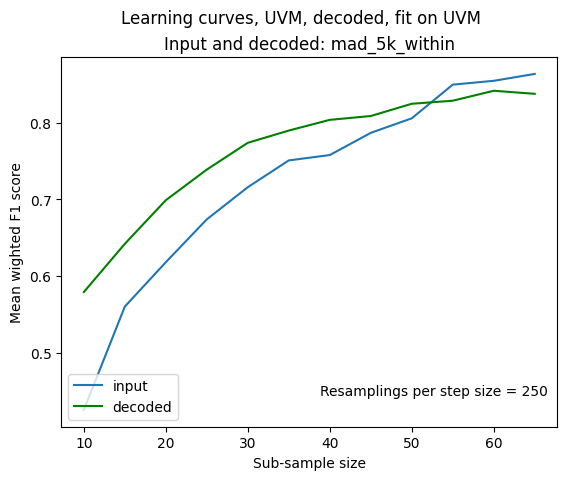

In [55]:
# Superimpose input on decoded
    # Using two dicts:
        # inpt_RF_F1_means
        # dec_RF_F1_means

plt.plot(list(inpt_RF_F1_means.keys()),
       inpt_RF_F1_means.values(),label='input')
plt.plot(list(dec_RF_F1_means.keys()),
       dec_RF_F1_means.values(),label='decoded', color = 'green')
# plt.plot(list(dec_RF_F1_means.keys()),
#        dec_RF_F1_means.values(),label='decoded')

plt.suptitle('Learning curves, '+df_to_clf.index.name+', decoded, fit on '+
             df_to_clf.index.name)
# plt.title('VAE input data: MAD 5K GEXP')
plt.title('Input and decoded: ' + feature_set) # across or within cohorts
plt.ylabel('Mean wighted F1 score')
plt.xlabel('Sub-sample size')
plt.annotate('Resamplings per step size = '+str(resmpl_count),
                xy=(.5, .2), xycoords='figure fraction',
                horizontalalignment='left', verticalalignment='top',
                )
plt.legend(loc="lower left")
plt.savefig(
    'i_o/figure_five/'+
    str(df_to_clf.index.name)+'.inpt_and_dec_fit_on.'+fit_on +'_'+feature_set+'_'+
    str(list(inpt_RF_F1_means.keys())[0])+'-to-'+str(smp_sz)+
    '_'+'rsmpls.'+str(resmpl_count)+
    '_super_inpt.dec_0.png', bbox_inches = 'tight')

In [ ]:
# Observation: decoded curve (green) starts taller
# then plateaus sooner than the blue input data

### Shuffle latent feature values  
Generate synthetic sample latent feature vector

In [ ]:
i_o/figure_five/UVM_fit_on.UVM_latent_object_latent_dim.10_epochs.160_mad_5k_within0.tsv

In [57]:
chrt = 'UVM'
latent_obj = pd.read_csv(
    'i_o/figure_five/UVM_fit_on.UVM_latent_object_latent_dim.10_epochs.160_mad_5k_within0.tsv',
        sep = '\t', index_col = 0)

In [71]:
len(sub)*2

26

In [72]:
synth_ndx_strt = 0

# synth_samples_per_subtype = 100 # no, make dynamic

synth_full_frame = pd.DataFrame()

# Take the reset starting index position from end of loop to create next synthetic subtype set

for subtype in sorted(latent_obj.Labels.unique()): # Subset the latent feature frame on each subtype
    
    print(subtype)
    
    # break
    
    sub = latent_obj[latent_obj.Labels == subtype]
    synth_lat_feat_vec = []
    
    sub_len = len(sub)*2
    
    synth_index = ['SYNTH-' + chrt + '-' + jtem for jtem in [str(
        item).zfill(5) for item in list(range(synth_ndx_strt,
                                              sub_len + synth_ndx_strt))]]
    # break
    
    synth_sub_frame = pd.DataFrame(index = synth_index)
    synth_sub_frame.insert(0, 'Labels', sub.Labels[0])
    
    for lat_feat in sub.columns[1:]:               # Go through the subtype latent feature set,
        # print(lat_feat)                            # skipping the Labels column
        lat_col = sub.loc[:, lat_feat]
        
        rand_lat_feat_vals = lat_col.sample(
            len(sub), replace = True, # <note> can toggle replacement off if taking less than number samples
            # index = synth_index
        ) # *
        rand_lat_feat_vals.index = synth_index
        synth_sub_frame = pd.concat(
            [synth_sub_frame, rand_lat_feat_vals], axis = 1)
        # break
    synth_full_frame = pd.concat(
        [synth_full_frame, synth_sub_frame], axis = 0)
    # break
    synth_ndx_strt = synth_ndx_strt + len(sub)
    # break

UVM_1


ValueError: Length mismatch: Expected axis has 22 elements, new values have 44 elements

In [59]:
synth_full_frame

,Labels,0,1,2,3,4,5,6,7,8,9
SYNTH-UVM-00000,UVM_1,0.000000,0.000000,0.000000,1.900938,0.000000,2.194812,0.335170,0.0,0.000000,2.545592
SYNTH-UVM-00001,UVM_1,0.000000,0.000000,0.000000,0.000000,0.000000,1.847196,1.195503,0.0,0.000000,2.403023
SYNTH-UVM-00002,UVM_1,0.000000,0.000000,0.000000,0.000000,0.000000,1.659983,2.783201,0.0,0.000000,1.444263
SYNTH-UVM-00003,UVM_1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.235529,0.0,0.000000,1.665146
SYNTH-UVM-00004,UVM_1,0.000000,0.000000,0.000000,0.000000,0.000000,1.659983,1.158292,0.0,1.529492,1.654296
...,...,...,...,...,...,...,...,...,...,...,...
SYNTH-UVM-00069,UVM_4,1.074491,1.178975,3.126703,2.362705,1.184628,0.706463,0.000000,0.0,1.272261,0.000000
SYNTH-UVM-00070,UVM_4,1.081726,1.104499,1.329191,2.016235,1.129174,0.000000,0.000000,0.0,1.484695,0.000000
SYNTH-UVM-00071,UVM_4,1.030838,1.252276,1.611013,2.149556,1.586016,0.706463,0.000000,0.0,1.384652,1.580846
SYNTH-UVM-00072,UVM_4,1.016299,1.018055,2.435568,2.703380,2.330164,0.000000,0.000000,0.0,1.224593,1.562637


In [ ]:
synth_full_frame.to_csv('i_o/shuffle/synthetic_feature_sets/'+
                        chrt+'_'+
                        str(synth_samples_per_subtype)+'_per_sbtyp.tsv',
                        sep = '\t')

In [ ]:
synth_full_frame_test = pd.read_csv('i_o/shuffle/synthetic_feature_sets/'+
                        chrt+'_'+
                        str(synth_samples_per_subtype)+'_per_sbtyp.tsv',
                        sep = '\t',
                                   index_col = 0)

In [61]:
# Trained decoder still in memory (5GB at this point)
synth_decoded = pd.DataFrame(decoder.predict( # note:
    synth_full_frame.iloc[:, 1:]),
        index=synth_full_frame.index, # Putting on synthetic index
            columns=decode_df.iloc[:, 1:].columns) # Putting on og columns

In [62]:
synth_decoded_labeled = pd.concat(
    [pd.DataFrame(synth_full_frame.Labels),
     synth_decoded] , axis =1)

In [63]:
df_to_clf = synth_decoded_labeled

In [66]:
# Superimpose dictionary 2 (decoded) samples build, version super 1

# dec_RF_F1_means = {}
synth_RF_F1_means = {}
for smp_sz in list(range(10, 70, 5)): # UVM <--- across run, plot up to 100?
# for smp_sz in list(range(10, 151, 5)): # BRCA <--- across run, mirror input steps above
    
    print(smp_sz)

    RF_output = []
    # resmpl_count = 150
    for r in list(range(0, resmpl_count)):
        
        labeled_sample_subset_frame = df_to_clf.sample(smp_sz) # df_to_clf set as decoded object now, not the input
        X = labeled_sample_subset_frame.iloc[:, 1:]
        y = labeled_sample_subset_frame.iloc[:, 0]
        X_train, X_test, y_train, y_test = train_test_split(
                    X, y,
                        test_size=0.33,
                            )
        RF_clf = RandomForestClassifier(max_depth=2)
        RF_clf.fit(X_train, y_train)

        RF_F1_scr = f1_score(y_test, RF_clf.predict(X_test), average='weighted')
        RF_output.append(RF_F1_scr)
           
    synth_RF_F1_means[smp_sz] = round(mean(RF_output), 3)

print('UVM dict 3 done')

10
15
20
25
30
35
40
45
50
55
60
65
UVM dict 3 done


In [68]:
df_to_clf.index.name = 'UVM'

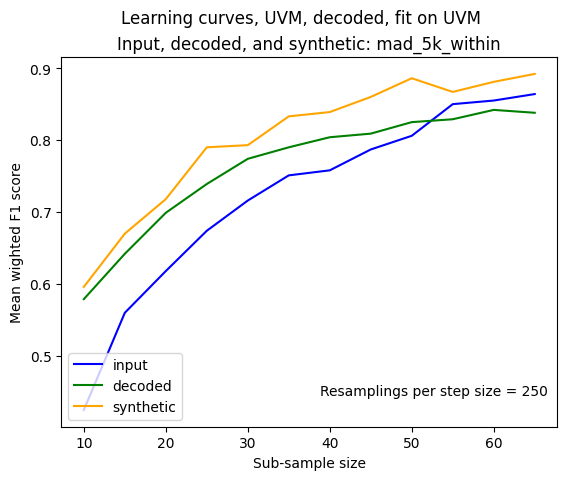

In [69]:
# Superimpose input on decoded
    # Using two dicts:
        # inpt_RF_F1_means
        # dec_RF_F1_means

plt.plot(list(inpt_RF_F1_means.keys()),
       inpt_RF_F1_means.values(),label='input', color = 'blue')
plt.plot(list(dec_RF_F1_means.keys()),
       dec_RF_F1_means.values(),label='decoded', color = 'green')
plt.plot(list(synth_RF_F1_means.keys()),
       synth_RF_F1_means.values(),label='synthetic', color = 'orange')

plt.suptitle('Learning curves, '+df_to_clf.index.name+', decoded, fit on '+
             df_to_clf.index.name)
# plt.title('VAE input data: MAD 5K GEXP')
plt.title('Input, decoded, and synthetic: ' + feature_set) # across or within cohorts
plt.ylabel('Mean wighted F1 score')
plt.xlabel('Sub-sample size')
plt.annotate('Resamplings per step size = '+str(resmpl_count),
                xy=(.5, .2), xycoords='figure fraction',
                horizontalalignment='left', verticalalignment='top',
                )
plt.legend(loc="lower left")
plt.savefig(
    'i_o/figure_five/'+
    str(df_to_clf.index.name)+'.inpt_and_dec_fit_on.'+fit_on +'_'+feature_set+'_'+
    str(list(inpt_RF_F1_means.keys())[0])+'-to-'+str(smp_sz)+
    '_'+'rsmpls.'+str(resmpl_count)+
    '_super_0_synth.png', bbox_inches = 'tight')

In [ ]:
# Refactor as utility
# Software to pass to lab
# Cell lines (?) paper two